In [1]:
%matplotlib notebook
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [8, 8]

from faker import Factory
from itertools import islice
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle

import pyodbc
import pysal as ps

from pysal.viz.mapclassify import Natural_Breaks as nb

from math import log10
from shapely.geometry import Point
from shapely import wkt

from IPython.display import IFrame

import folium
from folium.plugins import HeatMap

fake = Factory.create()

c:\users\gatesk\appdata\local\programs\python\python36\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


In [2]:
data_fout = os.path.join(os.path.dirname(os.getcwd()), 'data_out')

with open(os.path.join(data_fout, 'samples_buffered_normalised_4283.pickle'), 'rb') as f:
    samples = pickle.load(f)
    
with open(os.path.join(data_fout, 'buffers_4283.pickle'), 'rb') as f:
    buffers = pickle.load(f)

In [3]:
buffers.head()

,geometry,index,stroke
0,POLYGON ((150.3079888635762 -29.37525917739184...,0,#c13baa
1,"POLYGON ((150.339090016412 -29.39611544758894,...",0,#90cdfa
2,POLYGON ((141.7373528465147 -31.99632093655348...,0,#ce4ea4
3,POLYGON ((141.6299547726495 -31.97788901999016...,1,#56b830
4,POLYGON ((141.5933627601358 -32.09209102125658...,2,#e16597


In [4]:
samples.head()

,index,As_ppm,Au_ppm,FILEID,FILE_ID,LAT94,LNG94,RIN,RPT_ID,RPT_TYPE,...,NORTHING,Au_ppm_nn,Au_ppm_fn,Au_ppm_log,Au_ppm_nml,As_ppm_nn,As_ppm_fn,As_ppm_log,As_ppm_nml,Coordinates_4283
0,0,NaN,NaN,NaN,109.0,-29.378209,150.282157,R00029158,29,A,...,-3.422245e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (150.282157 -29.378209)
1,0,NaN,NaN,NaN,109.0,-29.363753,150.294260,R00029158,29,A,...,-3.420825e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (150.29426 -29.363753)
2,0,NaN,NaN,NaN,109.0,-29.396065,150.313078,R00029158,29,A,...,-3.424569e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (150.313078 -29.396065)
3,0,NaN,NaN,NaN,109.0,-29.388715,150.314466,R00029158,29,A,...,-3.423788e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (150.314466 -29.388715)
4,0,2.8,0.011,NaN,252.0,-31.994859,141.710774,R00029266,32,A,...,-3.630439e+06,0.011,0.011,-1.958607,1.0,2.8,2.8,0.447158,1.0,POINT (141.710774 -31.994859)


In [5]:
subbuffers = buffers.cx[141:142, -31:-33]

In [59]:
# subbuffers.plot()

In [6]:
subsamples = samples.cx[141:142, -31:-33]

<IPython.core.display.Javascript object>


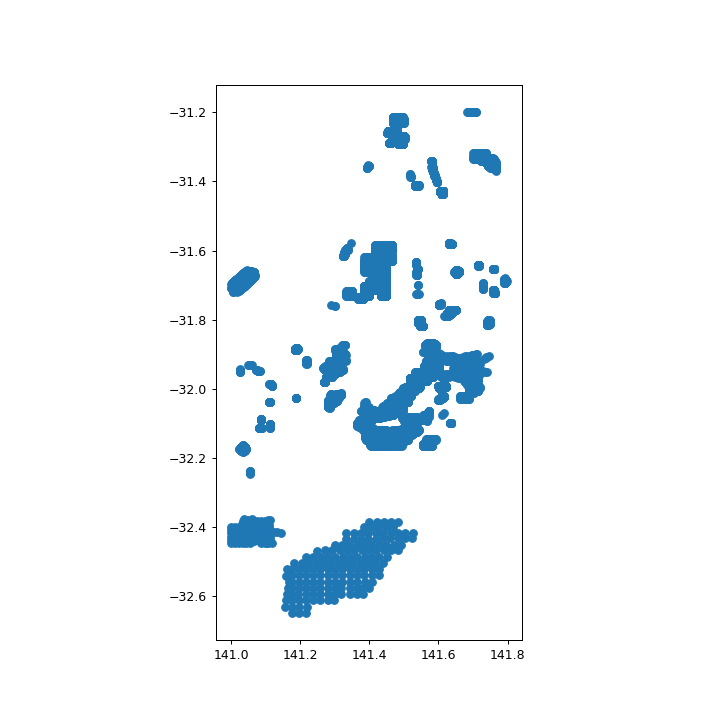

In [7]:
subsamples.plot()

In [53]:
# subbuffers.plot()
# subbuffers.to_file(os.path.join(data_fout, 'subbuffers.geojson'), driver ='GeoJSON')

In [8]:
subsamples

,index,As_ppm,Au_ppm,FILEID,FILE_ID,LAT94,LNG94,RIN,RPT_ID,RPT_TYPE,...,NORTHING,Au_ppm_nn,Au_ppm_fn,Au_ppm_log,Au_ppm_nml,As_ppm_nn,As_ppm_fn,As_ppm_log,As_ppm_nml,Coordinates_4283
4,0,2.8,0.011,NaN,252.0,-31.994859,141.710774,R00029266,32,A,...,-3.630439e+06,0.011,0.0110,-1.958607,1.000000,2.8,2.8,0.447158,1.000000,POINT (141.710774 -31.994859)
5,0,2.5,0.005,NaN,252.0,-31.993518,141.710919,R00029266,32,A,...,-3.630293e+06,0.005,0.0050,-2.301030,0.000000,2.5,2.5,0.397940,0.000000,POINT (141.710919 -31.993518)
6,1,6.0,-0.001,NaN,252.0,-31.965162,141.607901,R00029266,32,A,...,-3.626594e+06,-0.001,0.0005,-3.301030,0.000000,6.0,6.0,0.778151,1.000000,POINT (141.607901 -31.965162)
7,1,3.6,0.012,NaN,252.0,-31.959100,141.615062,R00029266,32,A,...,-3.625969e+06,0.012,0.0120,-1.920819,1.000000,3.6,3.6,0.556302,0.000000,POINT (141.615062 -31.9591)
8,2,1.1,0.004,NaN,252.0,-32.090668,141.552975,R00029266,32,A,...,-3.640056e+06,0.004,0.0040,-2.397940,0.611385,1.1,1.1,0.041393,0.058500,POINT (141.552975 -32.090668)
9,2,1.8,0.006,NaN,252.0,-32.090115,141.553243,R00029266,32,A,...,-3.639997e+06,0.006,0.0060,-2.221849,0.730598,1.8,1.8,0.255272,0.360773,POINT (141.553243 -32.090115)
10,2,3.4,0.002,NaN,252.0,-32.089702,141.553549,R00029266,32,A,...,-3.639953e+06,0.002,0.0020,-2.698970,0.407590,3.4,3.4,0.531479,0.751132,POINT (141.553549 -32.089702)
11,2,2.8,0.005,NaN,252.0,-32.089300,141.553881,R00029266,32,A,...,-3.639911e+06,0.005,0.0050,-2.301030,0.676992,2.8,2.8,0.447158,0.631963,POINT (141.553881 -32.0893)
12,2,2.1,0.003,NaN,252.0,-32.088720,141.554519,R00029266,32,A,...,-3.639851e+06,0.003,0.0030,-2.522879,0.526803,2.1,2.1,0.322219,0.455388,POINT (141.554519 -32.08872)
13,2,1.8,0.004,NaN,252.0,-32.088350,141.554793,R00029266,32,A,...,-3.639812e+06,0.004,0.0040,-2.397940,0.611385,1.8,1.8,0.255272,0.360773,POINT (141.554793 -32.08835)


In [13]:
# subsamples['Au_ppm_nml'].fillna(0, inplace=True)

In [39]:
# subsamples.to_file(os.path.join(data_fout, 'subsamples'))

In [9]:
element = 'Au_ppm_fn'

for subset, samples in subsamples.groupby(['RIN', 'index']):
    minv = samples[element].min()
    maxv = samples[element].max()
    mad = samples[element].mad()
    median = samples[element].median()
    mean = samples[element].mean()
    threshold = median + (mad+mad)
    thes2 = mean + (2*mad)
    try:
        print(subset, median.round(3), mean.round(3), mad.round(3), threshold.round(3), thes2.round(3))
    except:
        pass

('R00019347', 0) 0.003 0.004 0.002 0.007 0.008
('R00019368', 0) 0.002 0.003 0.002 0.005 0.006
('R00019369', 0) 0.001 0.001 0.001 0.002 0.003
('R00019627', 0) 0.002 0.003 0.002 0.006 0.006
('R00029266', 0) 0.008 0.008 0.003 0.014 0.014
('R00029266', 1) 0.006 0.006 0.006 0.018 0.018
('R00029266', 2) 0.003 0.004 0.002 0.007 0.008
('R00030096', 0) 0.001 0.002 0.002 0.005 0.006
('R00030130', 0) 0.001 0.001 0.0 0.002 0.002
('R00030130', 1) 0.001 0.001 0.001 0.002 0.002
('R00030130', 2) 0.001 0.001 0.001 0.002 0.003
('R00030131', 0) 0.001 0.001 0.0 0.002 0.002
('R00030131', 1) 0.003 0.007 0.008 0.018 0.023
('R00030143', 0) 0.0 0.0 0.0 0.001 0.001
('R00030340', 0) 0.002 0.002 0.001 0.003 0.003
('R00030349', 0) 0.002 0.002 0.001 0.003 0.003
('R00030843', 0) 0.003 0.004 0.003 0.009 0.01
('R00030846', 0) 0.001 0.001 0.001 0.002 0.003
('R00030849', 0) 0.005 0.009 0.007 0.02 0.024
('R00031787', 0) 0.002 0.003 0.002 0.006 0.007
('R00031972', 0) 0.004 0.004 0.0 0.004 0.004
('R00032769', 0) 0.01 0.019

c:\users\gatesk\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\nanfunctions.py:1019: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


('R00019347', 0) 0.438 0.467 0.111 0.66 0.578


<IPython.core.display.Javascript object>


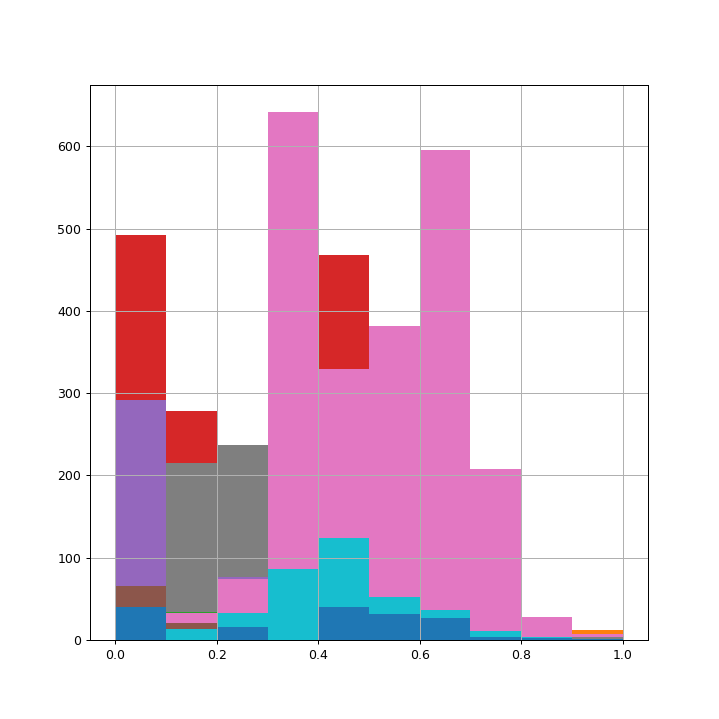

('R00019368', 0) 0.463 0.459 0.188 0.839 0.647
('R00019369', 0) 0.279 0.283 0.206 0.69 0.489
('R00019627', 0) 0.318 0.294 0.182 0.681 0.475
('R00029266', 0) 0.5 0.5 0.5 1.5 1.0
('R00029266', 1) 0.5 0.5 0.5 1.5 1.0
('R00029266', 2) 0.527 0.505 0.2 0.928 0.705
('R00030096', 0) 0.207 0.216 0.068 0.343 0.284
('R00030130', 0) 0.5 0.479 0.28 1.059 0.759
('R00030130', 1) 0.0 0.302 0.329 0.659 0.631
('R00030130', 2) 0.25 0.221 0.194 0.639 0.415
('R00030131', 0) 0.349 0.389 0.18 0.71 0.569
('R00030131', 1) 0.351 0.381 0.163 0.676 0.544
('R00030143', 0) 0.423 0.412 0.223 0.87 0.635
('R00030340', 0) 0.631 0.445 0.342 1.316 0.787
('R00030349', 0) 0.646 0.616 0.171 0.989 0.787
('R00030843', 0) 0.393 0.38 0.152 0.697 0.532
('R00030846', 0) 0.0 0.135 0.147 0.294 0.282
('R00030849', 0) 0.383 0.378 0.117 0.618 0.495
('R00031787', 0) 0.586 0.582 0.121 0.827 0.703
('R00032769', 0) 0.0 0.184 0.234 0.467 0.418
('R00032769', 1) 0.0 0.08 0.139 0.278 0.219
('R00032801', 0) 0.387 0.312 0.283 0.953 0.595
('R000

In [14]:
element = 'Au_ppm_nml'
for subset, samples in subsamples.groupby(['RIN', 'index']):
#     if subset[0] == 'R00019368':
        minv = samples[element].min()
        maxv = samples[element].max()
        mad = samples[element].mad()
        median = samples[element].median()
        mean = samples[element].mean()
        threshold = median + (mad+mad)
        thes2 = mean + (mad)
        try:
            print(subset, median.round(3), mean.round(3), mad.round(3), threshold.round(3), thes2.round(3))
            samples[element].hist()
        except:
            pass

In [138]:
# subsamples['Au_bins'] = pd.cut(subsamples.Au_ppm_nml, froms, labels=colours, include_lowest=True)

c:\users\gatesk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [23]:
from pysal.viz.mapclassify import Natural_Breaks as nb
# from pysal.viz.mapclassify import Fisher_Jenks as fj
# from pysal.viz.mapclassify import Quantiles as qt
import pandas as pd

colour_spectrum =[
'#DEEAF6',
'#CFE1F3',
'#B1CFED',
'#5EC8C2',
'#7FBB7F',
'#7EC067',
'#E68D3D',
'#DE5003',
'#C11C17',
'#A6358C']

coloured = gpd.GeoDataFrame()

element = 'Au_ppm_nml'

for subset, samples in subsamples.groupby(['RIN', 'index']):
#     if subset[0] == 'R00019368':
        minv = samples[element].min()
        
        samples[element].fillna(0, inplace=True)
    
        classifier = nb(samples['Au_ppm_nml'], 10)
        samples['nat_breaks'] = samples['Au_ppm_nml'].apply(classifier)
        samples.nat_breaks.replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], colour_spectrum, inplace=True)
        coloured = pd.DataFrame(pd.concat([coloured, samples], ignore_index=True))

        
#         minv = samples[element].min()
#         maxv = samples[element].max()
#         mad = samples[element].mad()
#         median = samples[element].median()
#         mean = samples[element].mean()
#         threshold = median + (mad+mad)
#         thes2 = mean + (mad)
#         try:
#             print(subset, median.round(3), mean.round(3), mad.round(3), threshold.round(3), thes2.round(3))
#             samples[element].hist()
#         except:
#             pass



# classifier = fj(subsamples['Au_ppm_nml'], 10)
# subsamples['jenks'] = subsamples['Au_ppm_nml'].apply(classifier)
# subsamples.jenks.replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], colour_spectrum, inplace=True)

# classifier = qt(subsamples['Au_ppm_nml'], 10)
# subsamples['qtiles'] = subsamples['Au_ppm_nml'].apply(classifier)
# subsamples.qtiles.replace([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], colour_spectrum, inplace=True)


c:\users\gatesk\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\gatesk\appdata\local\programs\python\python36\lib\site-packages\pysal\viz\mapclassify\classifiers.py:1428: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(ms, UserWarning)
c:\users\gatesk\appdata\local\programs\python\python36\lib\site-packages\pysal\viz\mapclassify\classifiers.py:1429: UserWarning: Warning: setting k to 6
  Warn("Warning: setting k to %d" % uvk, UserWarning)
c:\users\gatesk\appdata\local\programs\python\python36\lib\site-packages\pysal\viz\mapclassify\classifiers.py:1429: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % uvk, UserWarning)
c:

In [24]:
coloured

,index,As_ppm,Au_ppm,FILEID,FILE_ID,LAT94,LNG94,RIN,RPT_ID,RPT_TYPE,...,Au_ppm_nn,Au_ppm_fn,Au_ppm_log,Au_ppm_nml,As_ppm_nn,As_ppm_fn,As_ppm_log,As_ppm_nml,Coordinates_4283,nat_breaks
0,0,4.0,0.002,NaN,1114.0,-32.025608,141.613373,R00019347,2046,A,...,0.002,0.0020,-2.698970,0.338588,4.0,4.0,0.602060,0.304377,POINT (141.613373 -32.025608),#CFE1F3
1,0,4.5,0.003,NaN,1114.0,-32.024389,141.614942,R00019347,2046,A,...,0.003,0.0030,-2.522879,0.437618,4.5,4.5,0.653213,0.356098,POINT (141.614942 -32.024389),#B1CFED
2,0,4.0,0.003,NaN,1114.0,-32.024238,141.614745,R00019347,2046,A,...,0.003,0.0030,-2.522879,0.437618,4.0,4.0,0.602060,0.304377,POINT (141.614745 -32.024238),#B1CFED
3,0,4.0,0.002,NaN,1114.0,-32.024087,141.614548,R00019347,2046,A,...,0.002,0.0020,-2.698970,0.338588,4.0,4.0,0.602060,0.304377,POINT (141.614548 -32.024087),#CFE1F3
4,0,5.0,0.003,NaN,1114.0,-32.023937,141.614352,R00019347,2046,A,...,0.003,0.0030,-2.522879,0.437618,5.0,5.0,0.698970,0.402364,POINT (141.614352 -32.023937),#B1CFED
5,0,6.0,0.004,NaN,1114.0,-32.023786,141.614155,R00019347,2046,A,...,0.004,0.0040,-2.397940,0.507881,6.0,6.0,0.778151,0.482426,POINT (141.614155 -32.023786),#5EC8C2
6,0,4.0,0.004,NaN,1114.0,-32.023635,141.613958,R00019347,2046,A,...,0.004,0.0040,-2.397940,0.507881,4.0,4.0,0.602060,0.304377,POINT (141.613958 -32.023635),#5EC8C2
7,0,4.5,0.007,NaN,1114.0,-32.023484,141.613761,R00019347,2046,A,...,0.007,0.0070,-2.154902,0.644562,4.5,4.5,0.653213,0.356098,POINT (141.613761 -32.023484),#7EC067
8,0,5.0,0.007,NaN,1114.0,-32.023334,141.613564,R00019347,2046,A,...,0.007,0.0070,-2.154902,0.644562,5.0,5.0,0.698970,0.402364,POINT (141.613564 -32.023334),#7EC067
9,0,3.0,-0.001,NaN,1114.0,-32.023177,141.616507,R00019347,2046,A,...,-0.001,0.0005,-3.301030,0.000000,3.0,3.0,0.477121,0.178049,POINT (141.616507 -32.023177),#DEEAF6


In [25]:
coloured = gpd.GeoDataFrame(coloured)

# Make geometry field wkt (Well Known Text)
coloured['Coordinates'] = list(zip(coloured.LNG94.round(6), coloured.LAT94.round(6))) # Round to 6dp
coloured['Coordinates'] = coloured['Coordinates'].apply(Point)
coloured = gpd.GeoDataFrame(coloured, geometry='Coordinates', crs={'init' :'epsg:4283'})

In [30]:
coloured.drop('Coordinates_4283', inplace=True, axis=1)

In [32]:
# coloured.plot()
coloured.to_file(os.path.join(data_fout, 'coloured.geojson'), driver ='GeoJSON')

In [33]:
# Show me the buffers !!!!
m = folium.Map(location=[-32, 141.5], zoom_start=9)

samples = folium.FeatureGroup(name="samples")

sample_points = list(zip(coloured.LAT94.values, coloured.LNG94.values, coloured.Au_ppm_nml.values, coloured.nat_breaks.values))

    
for lat, lng, au, colour in sample_points:
    samples.add_child(folium.CircleMarker(location=[lat, lng], radius=1,
        popup=str(au), 
        tooltip=str(au),
        fill=True,  # Set fill to True
        color=str(colour),
        fill_opacity=0.5)).add_to(m)
    
folium.GeoJson(os.path.join(data_fout, 'subbuffers.geojson'),
    style_function=lambda x: {
        'color' : 'grey',
        'weight' : 2,
        'opacity': 0.66,
        'fillColor' : x['properties']['stroke'],
        }).add_to(m)

# m.add_child(samples)
m.add_child(folium.LayerControl())
m.save(os.path.join(data_fout, "coloured_trial.html"))

# IFrame(src='ALL_SAMPLES.html', width=1000, height=600)